<a href="https://colab.research.google.com/github/Dhanraj200547/Decision-Trees/blob/main/Student_Performance_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
df = pd.read_csv("/content/student-mat.csv", sep=';', quotechar='"')

In [36]:
pd.DataFrame(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


✅ Accuracy: 0.9113924050632911
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.94      0.92      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.91      0.90        79
weighted avg       0.91      0.91      0.91        79



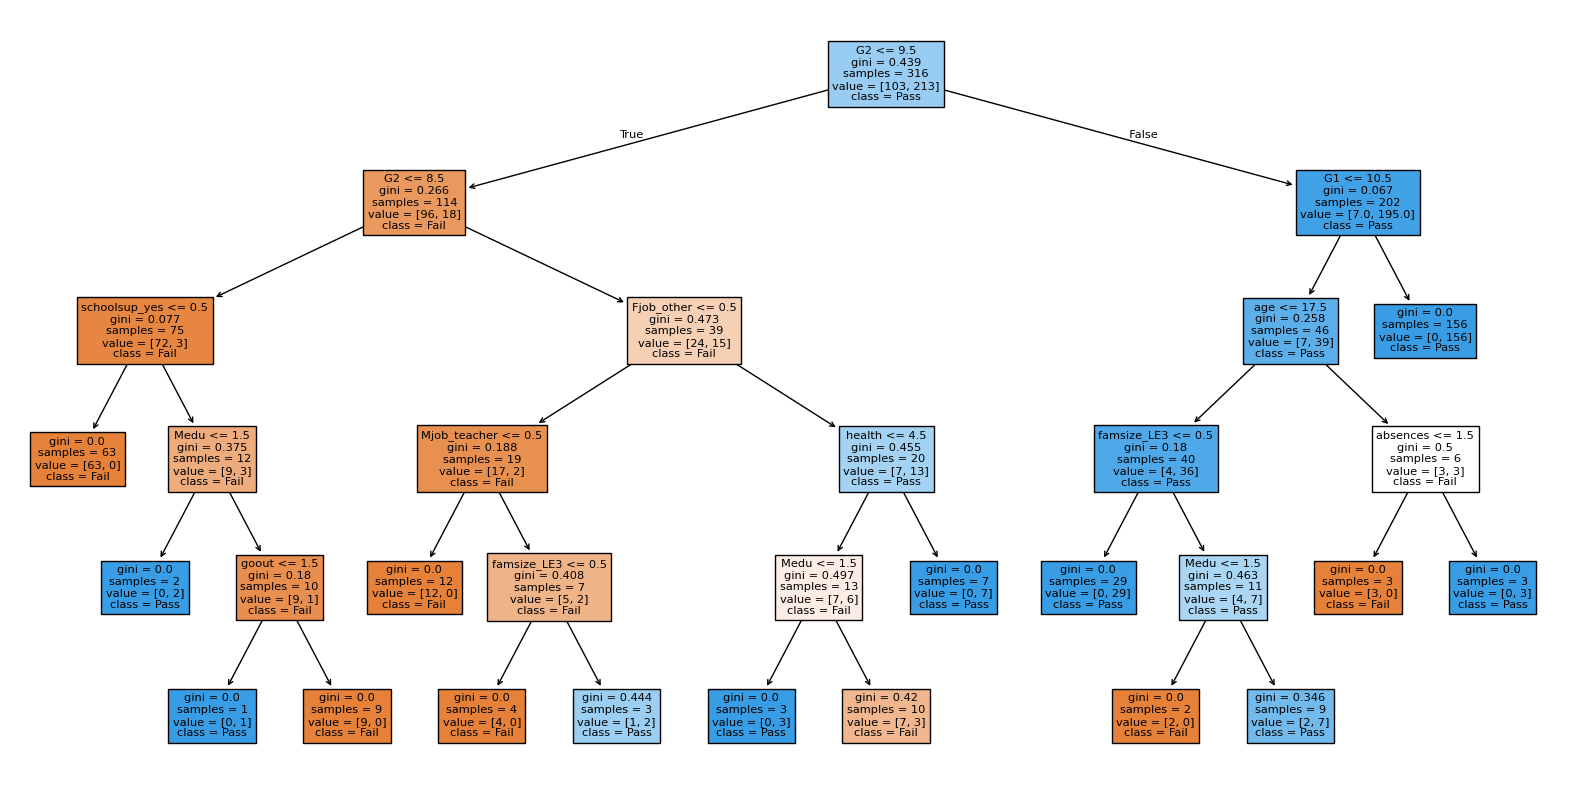

In [37]:
df['pass'] = df['G3'] >= 10
df['pass'] = df['pass'].astype(int)

# Drop G3 (final grade), we'll use pass/fail instead
df = df.drop(columns=['G3'])

# Convert categorical features to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df_encoded.drop(columns=['pass'])
y = df_encoded['pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Accuracy:", acc)
print("📋 Classification Report:\n", report)

# Visualize tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Fail', 'Pass'], filled=True)
plt.show()